In [1]:
import numpy as np
# from numpy import genfromtxt
# this is your 'bad' data set from github
my_data = np.genfromtxt('data.csv', delimiter=',')

In [2]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication
    return np.sum(inner) / (2 * len(X))

In [3]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        # you don't need the extra loop - this can be vectorize
        # making it much faster and simpler
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

In [4]:
# notice small alpha value
alpha = 0.0001
iters = 1000

In [5]:
# here x is columns
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
#X = np.hstack([ones, X]) # hstack Stack arrays in sequence horizontally (column wise)


# theta is a row vector
theta = np.array([[1.0, 1.0]])

# y is a columns vector
y = my_data[:, 1].reshape(-1,1)

In [6]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

[[ 1.03533399  1.45914293]] 56.041973778


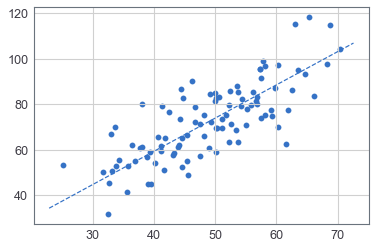

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1]* x_vals
plt.plot(x_vals, y_vals, '--')